In [51]:
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [52]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import time
import matplotlib.pyplot as plt

In [53]:
from data_helpers.wine_quality_data_helper import load_wine_quality_data
from data_helpers.mnist_data_helper import load_mnist_data

In [54]:
class GaussianMixtureWrapper:
    NAME = 'GMM'
    def __init__(self, n_components):
        self.n_components = n_components
        self.model = GaussianMixture(n_components=n_components)

    def fit(self, X):
        self.model.fit(X)

    def predict(self, X):
        return self.model.predict(X)
    
    def bic(self, X):
        return self.model.bic(X)

    def aic(self, X):
        return self.model.aic(X)

class KMeansWrapper:
    NAME = 'KMeans'
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.model = KMeans(n_clusters=n_clusters)

    def fit(self, X):
        self.model.fit(X)

    def predict(self, X):
        return self.model.predict(X)
    
    def inertia(self):
        return self.model.inertia_

In [55]:
DATASET_NAME = 'mnist'
# DATASET_NAME = 'wine_quality'

# METHOD = GaussianMixtureWrapper
METHOD = KMeansWrapper
SAVE = True

if DATASET_NAME == 'mnist':
    num_components = 18
elif DATASET_NAME == 'wine_quality':
    num_components = 5

In [56]:
if DATASET_NAME == 'wine_quality':
    DATASET_STR = 'Wine Quality'
    X, y, _, _ = load_wine_quality_data()
elif DATASET_NAME == 'mnist':
    DATASET_STR = 'MNIST'
    X, y, _, _ = load_mnist_data()
else:
    raise ValueError(f'Invalid dataset name {DATASET_NAME}')

In [57]:
N = int(X.shape[0] * 0.8)
X_train = X[:N]
X_test = X[N:]
y_train = y[:N]
y_test = y[N:]

In [58]:
model = METHOD(num_components)
model.fit(X_train)
pred = model.predict(X_test)

In [59]:
buckets = {}
for i in range(num_components):
    mask = pred == i
    y_masked = y_test[mask]
    buckets[i] = y_masked

In [60]:
# sort buckets by size (largest to smallest)
buckets = {k: v for k, v in sorted(buckets.items(), key=lambda item: len(item[1]), reverse=True)}

In [61]:
colors = {0: 'red', 1: 'green', 2: 'blue'}

(0.0, 500.0)

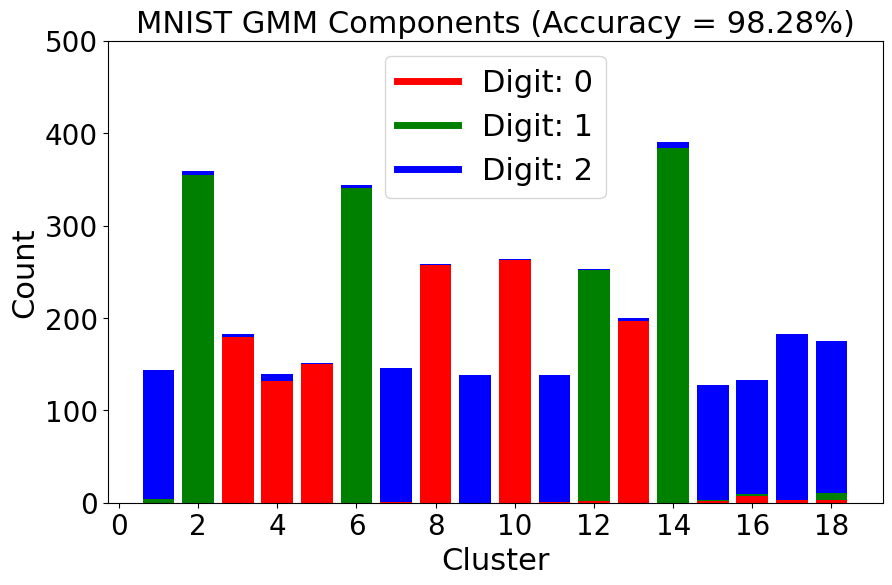

In [62]:
plt.figure(figsize=(10, 6))
for bucket_num, labels in buckets.items():
    bottom = 0
    for label_num in np.unique(labels):
        l = sum(labels == label_num)
        plt.bar(bucket_num+1, l, bottom=bottom, color=colors[label_num])
        bottom += l

# get accuracy
wrong_count = 0
for bucket_num, labels in buckets.items():
    counts = np.bincount(labels)
    most_common = np.argmax(counts)
    wrong_count += sum(labels != most_common)
acc = 1 - (wrong_count / len(y_test))

fontsize = 22
plt.title(f'{DATASET_STR} GMM Components (Accuracy = {acc:.2%})', fontsize=fontsize)
plt.xlabel('Cluster', fontsize=fontsize)
plt.ylabel('Count', fontsize=fontsize)

custom_lines = [plt.Line2D([0], [0], color=colors[0], lw=5),
                plt.Line2D([0], [0], color=colors[1], lw=5),
                plt.Line2D([0], [0], color=colors[2], lw=5)]
plt.legend(custom_lines, ['Digit: 0', 'Digit: 1', 'Digit: 2'], fontsize=fontsize)

# set fontsize for ticks
plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)

plt.xticks(range(0, num_components+1, num_components//8))

plt.ylim(0, 500)

# path = '/Users/sdale/repos/gatech/machine_learning/unsupervised_learning/final_results/step_1/mnist_gmm_bars.png'
# os.makedirs(os.path.dirname(path), exist_ok=True)
# plt.savefig(path)

In [63]:
pred

array([10, 13,  1, ..., 12, 11,  8], dtype=int32)

In [64]:
pred.shape

(3725,)

In [65]:
X_test.shape

(3725, 196)

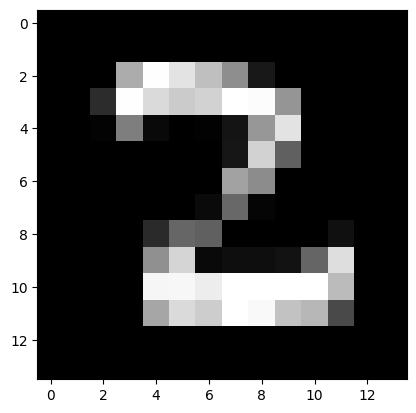

In [66]:
img = X_test[0]
# img[132] = 1
# img[73] = 1
plt.imshow(img.reshape(14, 14), cmap='gray')

In [67]:
pred

array([10, 13,  1, ..., 12, 11,  8], dtype=int32)

In [ ]:
d1 = 132
d2 = 73
X1 = X_test[:, d1]
X2 = X_test[:, d2]
mask0 = pred
plt.plot()